# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Data sets\Purchase.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [10]:
# Feature Engineering

In [11]:
x=data.iloc[:,[2,3]].values  # independent variables
y=data.iloc[:,4].values     # dependent variable

In [12]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
# spliting the data into Training set and test set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=12)

In [16]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(280, 2) (280,)
(120, 2) (120,)


In [17]:
# Fitting Logistic Regression to the training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [19]:
# predicting the testset results

In [20]:
y_pred =classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
y_pred_prob = classifier.predict_proba(x_test)
y_pred_prob

array([[0.58584158, 0.41415842],
       [0.56949847, 0.43050153],
       [0.63544995, 0.36455005],
       [0.51969441, 0.48030559],
       [0.52657614, 0.47342386],
       [0.59346982, 0.40653018],
       [0.53050419, 0.46949581],
       [0.58105267, 0.41894733],
       [0.63270681, 0.36729319],
       [0.54128544, 0.45871456],
       [0.57913277, 0.42086723],
       [0.62995504, 0.37004496],
       [0.5481268 , 0.4518732 ],
       [0.6104644 , 0.3895356 ],
       [0.53834851, 0.46165149],
       [0.60105323, 0.39894677],
       [0.5422638 , 0.4577362 ],
       [0.61793488, 0.38206512],
       [0.5383485 , 0.4616515 ],
       [0.5305042 , 0.4694958 ],
       [0.60858848, 0.39141152],
       [0.57721049, 0.42278951],
       [0.57335894, 0.42664106],
       [0.56949847, 0.43050153],
       [0.58009304, 0.41990696],
       [0.52755849, 0.47244151],
       [0.56369203, 0.43630797],
       [0.55397647, 0.44602353],
       [0.54128545, 0.45871455],
       [0.54226379, 0.45773621],
       [0.

In [22]:
y_pred_prob.shape

(120, 2)

In [23]:
y_pred # predicted output values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
y_test # Actual output values

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [25]:
# making the confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test , y_pred)

array([[73,  0],
       [47,  0]], dtype=int64)

In [42]:
accuracy_score(y_test , y_pred)

0.6083333333333333

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
x_train

array([[-5.15067116e-01,  2.43892175e+00],
       [-1.09079084e+00, -1.02710704e+00],
       [-3.52973473e-02, -5.14737569e-01],
       [-8.98882931e-01,  4.49722619e-01],
       [ 1.56610560e-01,  1.11278900e+00],
       [-2.27205255e-01, -2.43483141e-01],
       [ 1.49996591e+00,  1.05251024e+00],
       [-1.09079084e+00, -5.14737569e-01],
       [-1.76246852e+00,  2.77712866e-02],
       [-1.09079084e+00, -1.62989466e+00],
       [ 4.44472422e-01, -1.22925618e-01],
       [-8.02928977e-01,  2.37864299e+00],
       [-9.94836885e-01, -3.64040664e-01],
       [ 1.21210405e+00, -1.47919776e+00],
       [ 1.69187382e+00, -9.06549520e-01],
       [ 1.97973568e+00,  7.81255808e-01],
       [ 1.88378173e+00,  1.59501909e+00],
       [ 2.17164359e+00,  4.19583238e-01],
       [ 4.44472422e-01,  1.17306776e+00],
       [ 1.40401196e+00,  6.30558904e-01],
       [ 3.48518468e-01,  3.29165095e-01],
       [ 1.56610560e-01,  2.38746953e-01],
       [-1.85842247e+00, -7.55852616e-01],
       [-7.

In [30]:
x_test

array([[ 2.07568964,  0.57028014],
       [ 0.15661056,  0.05791067],
       [ 1.1161501 ,  2.16766733],
       [-0.22720525, -1.47919776],
       [-0.22720525, -1.26822209],
       [ 1.02019614,  0.81139519],
       [-0.99483689, -1.14766457],
       [-0.80292898,  0.41958324],
       [ 1.40401196,  2.07724918],
       [ 0.15661056, -0.81613138],
       [-1.47460665,  0.35930448],
       [-0.51506712,  1.98683104],
       [ 0.92424219, -0.60515571],
       [ 1.40401196,  1.35390404],
       [ 0.63638033, -0.90654952],
       [ 0.44447242,  1.05251024],
       [ 0.92424219, -0.785992  ],
       [ 0.15661056,  1.59501909],
       [-0.22720525, -0.90654952],
       [-0.41911316, -1.14766457],
       [ 0.06065661,  1.29362528],
       [ 0.44447242,  0.29902571],
       [ 0.15661056,  0.17846819],
       [-0.03529735,  0.05791067],
       [ 0.82828824,  0.38944386],
       [ 1.1161501 , -1.23808271],
       [ 0.06065661, -0.12292562],
       [-1.28269875, -0.42431943],
       [ 2.17164359,

In [31]:
y_train

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [32]:
classifier1=LogisticRegression()
classifier1.fit(x_train , y_train)

LogisticRegression()

In [33]:
y_pred1 = classifier1.predict(x_test)
y_pred1

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [34]:
y_pred_prob1 = classifier.predict_proba(x_test)
y_pred_prob1

array([[0.50000056, 0.49999944],
       [0.50000006, 0.49999994],
       [0.50000214, 0.49999786],
       [0.49999854, 0.50000146],
       [0.49999875, 0.50000125],
       [0.5000008 , 0.4999992 ],
       [0.49999887, 0.50000113],
       [0.50000041, 0.49999959],
       [0.50000205, 0.49999795],
       [0.4999992 , 0.5000008 ],
       [0.50000035, 0.49999965],
       [0.50000196, 0.49999804],
       [0.4999994 , 0.5000006 ],
       [0.50000133, 0.49999867],
       [0.49999911, 0.50000089],
       [0.50000104, 0.49999896],
       [0.49999923, 0.50000077],
       [0.50000157, 0.49999843],
       [0.49999911, 0.50000089],
       [0.49999887, 0.50000113],
       [0.50000127, 0.49999873],
       [0.50000029, 0.49999971],
       [0.50000018, 0.49999982],
       [0.50000006, 0.49999994],
       [0.50000038, 0.49999962],
       [0.49999878, 0.50000122],
       [0.49999988, 0.50000012],
       [0.49999958, 0.50000042],
       [0.4999992 , 0.5000008 ],
       [0.49999923, 0.50000077],
       [0.

In [35]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
confusion_matrix(y_test,y_pred1)

array([[61, 12],
       [ 9, 38]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred1)

0.825

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

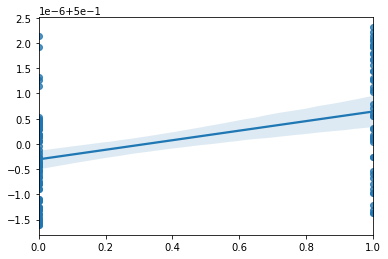

In [38]:
sns.regplot(y_test , y_pred_prob1[:,0] , logistic = True)